### **Introdução à Rasterização**

#### **1. Recapitulando: Matricial vs. Vetorial**

Na última aula, exploramos os dois universos fundamentais da representação de imagens digitais:

*   **Imagens Matriciais (Raster):** Compostas por uma grade de pixels (elementos picture). Cada pixel possui uma cor e uma coordenada específica. São dependentes de resolução – se ampliadas demais, perdem qualidade, exibindo os famosos "serrilhados" ou *pixelation*. Exemplos: fotos digitais, telas de monitores.

*   **Imagens Vetoriais:** Compostas por entidades geométricas definidas matematicamente (pontos, linhas, curvas, polígonos). São independentes de resolução – podem ser escaladas infinitamente sem perda de qualidade. Exemplos: logotipos, fontes de texto (*TrueType*, *OpenType*), ilustrações em SVG.

**Pergunta crucial:** Se nossos dispositivos de exibição (monitores, telas de celular, projetores) são, em sua essência, grades gigantes de pixels (matrizes), **como exibimos uma imagem vetorial, que é uma descrição matemática, em um dispositivo matricial?**

A resposta é um processo fundamental da Computação Gráfica: a **Rasterização**.

#### **2. O que é Rasterização?**

**Rasterização** é o processo de conversão de uma descrição geométrica vetorial (primitivas gráficas como linhas, círculos, polígonos) em uma imagem raster (uma matriz de pixels) para exibição em um dispositivo de saída.

Pense nisso como "preencher a grade" do monitor com as cores corretas baseando-se nas equações matemáticas que descrevem os objetos.

**Analogia:** Imagine um artista que desenha um projeto perfeito de um círculo usando compasso e régua (representação vetorial). A rasterização é o trabalho de um mosaicista que pega esse projeto e usa pequenos azulejos quadrados (pixels) para compor a imagem desse círculo na parede. Quanto menores e mais numerosos os azulejos, mais fiel ao círculo original a obra final será.

#### **3. Por que a Rasterização é Tão Importante?**

Quase toda a gráfica que interage com você em tempo real – jogos, interfaces de usuário (Windows, macOS, iOS, Android), visualizações 3D – é gerada através de rasterização. Suas vantagens principais são:

*   **Velocidade:** Algoritmos de rasterização são extremamente eficientes e otimizados para hardware (GPUs), permitindo gerar frames complexos em milésimos de segundos (altos FPS - *Frames Per Second*).
*   **Simplicidade Relativa:** O conceito básico de "decidir qual pixel pintar" é mais direto de implementar em hardware do que outras técnicas, como o *ray tracing*.
*   **Dominância do Hardware:** As GPUs (Unidades de Processamento Gráfico) modernas são construídas especificamente como máquinas de rasterização massivamente paralelas, solidificando a técnica como o padrão da indústria para renderização em tempo real.

#### **4. O Problema Central da Rasterização**

O grande desafio que a rasterização busca resolver é: 

* **Dada uma primitiva geométrica (ex.: uma linha do ponto (X1, Y1) ao ponto (X2, Y2)), quais pixels na grade da tela devem ser coloridos para representá-la da forma mais fiel e visualmente agradável possível?**

Uma linha matemática é contínua e infinita em sua precisão. Nossa tela é discreta e finita (composta de pixels inteiros). Não há "meio pixel". Portanto, precisamos de um algoritmo para fazer essa aproximação.

##### **Exemplo Prático (Linha):**

Suponha uma linha do pixel (0,0) ao pixel (5,2). Quais pixels acender?

Uma solução ingênua não funcionaria. Precisamos de um algoritmo inteligente para evitar falhas, descontinuidades e serrilhados excessivos. É aqui que entram algoritmos clássicos como o **Algoritmo de Linha de Bresenham**, um método eficiente que usa apenas cálculos inteiros para determinar a melhor sequência de pixels para representar uma linha.

#### **5. O Pipeline de Rasterização (Visão Simplificada)**

O processo completo é um *pipeline* (linha de montagem), mas hoje focamos na etapa final:

1.  **Definição das Primitivas:** A aplicação (jogo, software) define o que deve ser desenhado usando vértices e primitivas ("desenhe um triângulo com vértices A, B, C", "desenhe uma linha de D até E").
2.  **Transformações:** Essas primitivas passam por transformações geométricas (projeção de perspectiva, rotação, escala) para serem posicionadas corretamente na cena 2D ou 3D.
3.  **A Etapa da Rasterização (Nosso Foco):** As primitivas transformadas são convertidas em um conjunto de **fragments**. Um *fragment* é um candidato a pixel, contendo dados como coordenada, cor, profundidade.
4.  **Teste e Mistura (Testing & Blending):** Cada *fragment* passa por testes (ex.: teste de profundidade - *Z-buffer* - para ver se ele está na frente de outros objetos) e pode ter sua cor misturada com a cor já existente no pixel (para transparências).
5.  **Escrita do Pixel (Output Merge):** O *fragment* que "vencer" todos os testes finalmente tem sua cor escrita no pixel correspondente no *framebuffer* (a memória de vídeo que armazena a imagem a ser exibida).
6.  **Exibição:** O monitor varre o *framebuffer* e exibe a imagem final.

#### **6. Próximos Passos**

A rasterização é a ponte essencial entre o mundo abstrato e preciso da matemática vetorial e o mundo físico e discreto dos nossos dispositivos de exibição. É a técnica que torna possível a gráfica interativa e rápida que dominamos hoje.

##### **Vamos mergulhar nos detalhes algorítmicos!**

Responderemos a pergunta: "Como o algoritmo de Bresenham decide, de forma tão eficiente, quais pixels acender para formar uma linha?" e iniciaremos a discussão sobre como rasterizar outras primitivas, como triângulos, que são a base de todos os modelos 3D.

---

### Pipeline Gráfico 2D: Do Objeto ao Pixel

Antes de mergulharmos na rasterização em si, é fundamental entender o pipeline gráfico 2D completo - o processo que transforma objetos geométricos em pixels na tela. Este pipeline define como cada estágio do processo contribui para o estado final de cada pixel.

O Pipeline Gráfico 2D Simplificado

```mermaid
flowchart TD
A[Objetos Geométricos] --> B[Transformações]
B --> C[Clipping<br>Recorte na Janela de Visualização]
C --> D[Rasterização<br>Conversão para pixels]
D --> E[Operações por Fragmento<br>Testes e Blending]
E --> F[Framebuffer<br>Imagem Final]
```

In [1]:
%pip install matplotlib
%pip install numpy

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 9.9 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.9 MB/s  0:00:00
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 28.3 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -----------

=== SIMULAÇÃO DO PIPELINE GRÁFICO 2D ===



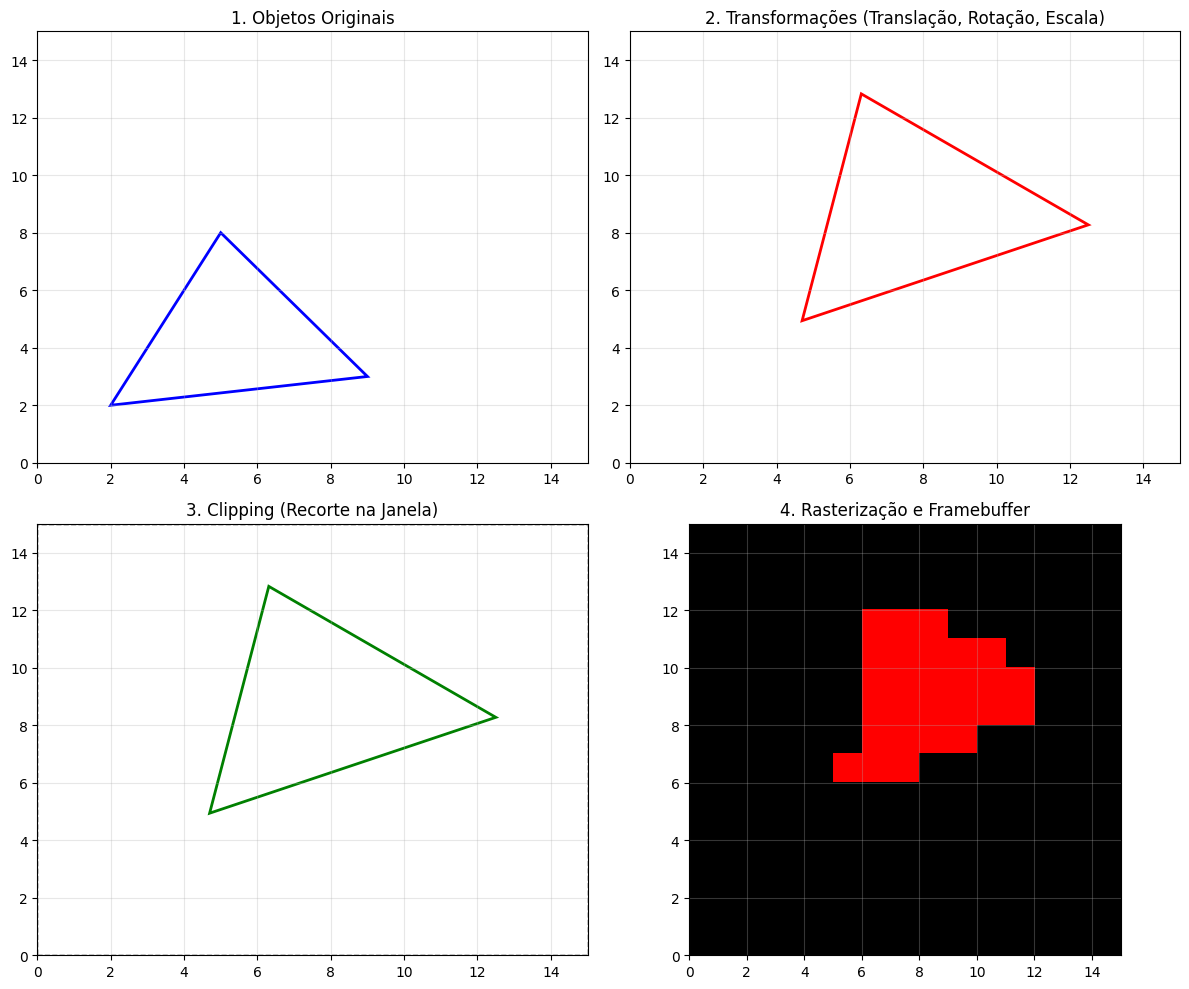

Pipeline executado com sucesso!
Cada pixel no framebuffer final foi influenciado por:
- As transformações aplicadas ao objeto
- O recorte na janela de visualização
- A região de scissor definida
- O algoritmo de rasterização
- Os testes de estêncil e profundidade


In [2]:
# Código de Simulação do Pipeline Gráfico

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

class PipelineGrafico2D:
    def __init__(self, largura=20, altura=20):
        self.largura = largura
        self.altura = altura
        self.framebuffer = np.zeros((altura, largura, 3))  # RGB
        self.z_buffer = np.full((altura, largura), np.inf)  # Profundidade
        self.stencil_buffer = np.zeros((altura, largura), dtype=int)  # Estêncil
        self.scissor_box = (0, 0, largura, altura)  # Caixa de recorte padrão
        
    def aplicar_transformacao(self, vertices, translacao=(0, 0), rotacao=0, escala=(1, 1)):
        """Aplica transformações geométricas aos vértices"""
        # Matriz de transformação (simplificada)
        cos_theta = np.cos(rotacao)
        sin_theta = np.sin(rotacao)
        
        vertices_transformados = []
        for x, y in vertices:
            # Escala
            x_esc, y_esc = x * escala[0], y * escala[1]
            # Rotação
            x_rot = x_esc * cos_theta - y_esc * sin_theta
            y_rot = x_esc * sin_theta + y_esc * cos_theta
            # Translação
            x_final = x_rot + translacao[0]
            y_final = y_rot + translacao[1]
            
            vertices_transformados.append((x_final, y_final))
            
        return vertices_transformados
    
    def clipping(self, vertices):
        """Recorta a geometria para dentro da janela de visualização"""
        vertices_recortados = []
        
        for x, y in vertices:
            # Verifica se o ponto está dentro da janela
            if 0 <= x < self.largura and 0 <= y < self.altura:
                vertices_recortados.append((x, y))
            # Em uma implementação real, faríamos clipping de linhas e polígonos
            # usando algoritmos como Cohen-Sutherland ou Liang-Barsky
            
        return vertices_recortados if vertices_recortados else vertices
    
    def rasterizar_triangulo(self, vertices, cor=(1, 0, 0)):
        """Rasteriza um triângulo usando coordenadas baricêntricas"""
        A, B, C = vertices
        
        # Encontra a bounding box
        min_x = max(0, int(min(A[0], B[0], C[0])))
        max_x = min(self.largura - 1, int(max(A[0], B[0], C[0])))
        min_y = max(0, int(min(A[1], B[1], C[1])))
        max_y = min(self.altura - 1, int(max(A[1], B[1], C[1])))
        
        # Calcula a área total (2x)
        area_total = (B[0] - A[0]) * (C[1] - A[1]) - (B[1] - A[1]) * (C[0] - A[0])
        
        # Itera sobre todos os pixels na bounding box
        for y in range(min_y, max_y + 1):
            for x in range(min_x, max_x + 1):
                # Teste de scissor (recorte adicional)
                if not (self.scissor_box[0] <= x < self.scissor_box[2] and 
                        self.scissor_box[1] <= y < self.scissor_box[3]):
                    continue
                
                P = (x, y)
                
                # Calcula áreas parciais (2x)
                area_PBC = (B[0] - P[0]) * (C[1] - P[1]) - (B[1] - P[1]) * (C[0] - P[0])
                area_PCA = (C[0] - P[0]) * (A[1] - P[1]) - (C[1] - P[1]) * (A[0] - P[0])
                area_PAB = (A[0] - P[0]) * (B[1] - P[1]) - (A[1] - P[1]) * (B[0] - P[0])
                
                # Calcula as coordenadas baricêntricas
                alpha = area_PBC / area_total
                beta = area_PCA / area_total
                gamma = area_PAB / area_total
                
                # Verifica se o ponto está dentro do triângulo
                if alpha >= 0 and beta >= 0 and gamma >= 0:
                    # Teste de estêncil (exemplo: só desenha onde stencil == 0)
                    if self.stencil_buffer[y, x] == 0:
                        # Teste de profundidade (Z-test)
                        profundidade = alpha * A[2] + beta * B[2] + gamma * C[2] if len(A) > 2 else 0
                        if profundidade < self.z_buffer[y, x]:
                            self.z_buffer[y, x] = profundidade
                            
                            # Blending (simples overwrite neste exemplo)
                            self.framebuffer[y, x] = cor
    
    def definir_scissor(self, x, y, largura, altura):
        """Define a região de recorte (scissor box)"""
        self.scissor_box = (x, y, x + largura, y + altura)
    
    def definir_stencil(self, x, y, valor):
        """Define um valor no buffer de estêncil"""
        if 0 <= x < self.largura and 0 <= y < self.altura:
            self.stencil_buffer[y, x] = valor
    
    def visualizar_pipeline(self, vertices_originais, vertices_transformados, vertices_recortados):
        """Visualiza todas as etapas do pipeline"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        
        # Etapa 1: Objetos originais
        ax1.set_title("1. Objetos Originais")
        ax1.set_xlim(0, self.largura)
        ax1.set_ylim(0, self.altura)
        ax1.grid(True, alpha=0.3)
        poligono_original = Polygon(vertices_originais, closed=True, fill=False, color='blue', linewidth=2)
        ax1.add_patch(poligono_original)
        
        # Etapa 2: Transformações
        ax2.set_title("2. Transformações (Translação, Rotação, Escala)")
        ax2.set_xlim(0, self.largura)
        ax2.set_ylim(0, self.altura)
        ax2.grid(True, alpha=0.3)
        poligono_transformado = Polygon(vertices_transformados, closed=True, fill=False, color='red', linewidth=2)
        ax2.add_patch(poligono_transformado)
        
        # Etapa 3: Clipping
        ax3.set_title("3. Clipping (Recorte na Janela)")
        ax3.set_xlim(0, self.largura)
        ax3.set_ylim(0, self.altura)
        ax3.grid(True, alpha=0.3)
        
        # Desenha a janela de visualização
        janela = Rectangle((0, 0), self.largura, self.altura, fill=False, color='black', linestyle='--')
        ax3.add_patch(janela)
        
        poligono_recortado = Polygon(vertices_recortados, closed=True, fill=False, color='green', linewidth=2)
        ax3.add_patch(poligono_recortado)
        
        # Etapa 4: Rasterização e Resultado Final
        ax4.set_title("4. Rasterização e Framebuffer")
        ax4.imshow(self.framebuffer, origin='lower', extent=[0, self.largura, 0, self.altura])
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Exemplo de uso
if __name__ == "__main__":
    print("=== SIMULAÇÃO DO PIPELINE GRÁFICO 2D ===\n")
    
    # Cria o pipeline
    pipeline = PipelineGrafico2D(largura=15, altura=15)
    
    # Define um triângulo (vértices originais)
    vertices_originais = [(2, 2), (5, 8), (9, 3)]
    
    # 1. Aplica transformações
    vertices_transformados = pipeline.aplicar_transformacao(
        vertices_originais, 
        translacao=(3, 2), 
        rotacao=np.radians(15),  # 15 graus em radianos
        escala=(1.2, 1.2)
    )
    
    # 2. Aplica clipping
    vertices_recortados = pipeline.clipping(vertices_transformados)
    
    # 3. Configurações adicionais que afetam o resultado
    pipeline.definir_scissor(2, 2, 10, 10)  # Define uma região de recorte
    
    # 4. Rasteriza o triângulo
    pipeline.rasterizar_triangulo(vertices_recortados, cor=(1, 0, 0))  # Vermelho
    
    # 5. Visualiza todo o pipeline
    pipeline.visualizar_pipeline(vertices_originais, vertices_transformados, vertices_recortados)
    
    print("Pipeline executado com sucesso!")
    print("Cada pixel no framebuffer final foi influenciado por:")
    print("- As transformações aplicadas ao objeto")
    print("- O recorte na janela de visualização")
    print("- A região de scissor definida")
    print("- O algoritmo de rasterização")
    print("- Os testes de estêncil e profundidade")

### O Que Influencia o Estado de um Pixel?

Cada pixel na imagem final é o resultado de várias etapas do pipeline:

1. Objetos Geométricos Originais
   · A forma primitiva (triângulo, retângulo, etc.)
   · Suas coordenadas originais
2. Transformações
   · Translação: Movimento do objeto
   · Rotação: Gira o objeto em torno de um ponto
   · Escala: Aumenta ou diminui o tamanho do objeto
3. Clipping (Recorte)
   · Apenas a parte dentro da janela de visualização é processada
   · Partes fora da janela são descartadas
4. Rasterização
   · Determina quais pixels são cobertos pelo objeto
   · Usa algoritmos como coordenadas baricêntricas para triângulos
5. Testes e Operações
   · Scissor Test: Recorte adicional em região retangular
   · Stencil Test: Máscara para controlar onde desenhar
   · Depth Test: Decide qual objeto está na frente (em 2.5D)
   · Blending: Combina a cor do objeto com a cor de fundo
6. Escrita no Framebuffer
   · O valor final do pixel é armazenado no framebuffer
   · Várias operações podem modificar este valor (blending, operações lógicas)

#### Visualizando o Pipeline

O código acima cria uma visualização com quatro painéis que mostram:

1. Objetos Originais: A forma geométrica antes de qualquer transformação
2. Transformações: Como a forma é modificada por translação, rotação e escala
3. Clipping: Como a forma é recortada para caber na janela de visualização
4. Rasterização: O resultado final após todos os processos

Esta abordagem ajuda os alunos a entenderem que a rasterização é apenas uma parte de um processo maior, e que cada estágio do pipeline gráfico contribui para determinar a cor final de cada pixel na tela.

Perfeito! Vamos então mergulhar nos detalhes algorítmicos, focando no coração da rasterização de primitivas básicas: linhas e triângulos.

---

### **Algoritmos de Rasterização**

---

#### **1. Introdução: O Problema da Amostragem**

Rasterizar uma primitiva é, em essência, um **problema de amostragem**. Temos uma função geométrica contínua (uma linha, uma curva) e precisamos amostrá-la em pontos discretos (as coordenadas inteiras do centro de cada pixel).

O objetivo é escolher a melhor sequência de pixels que se aproxima da primitiva original, minimizando o *aliasing* (serrilhado) e maximizando a eficiência.

#### **2. Rasterização de Linhas: O Algoritmo de Bresenham**

Vamos resolver o problema proposto na aula passada: desenhar uma linha do ponto (x₀, y₀) até (x₁, y₁) em uma grade de pixels.

**Desafio:** Uma linha matemática tem inclinação `m = Δy/Δx`. Para avançar um pixel em x, precisamos avançar `m` pixels em y. Como `m` é quase sempre uma fração, precisamos decidir se arredondamos y para cima ou para baixo a cada passo.

O algoritmo de Bresenham (1965) resolve isso usando **apenas aritmética inteira**, tornando-o incrivelmente rápido. É um algoritmo baseado em **decisão por erro**.

**Intuição do Funcionamento:**
1.  Trabalhamos com a ideia de um **erro** (`e`), que acumula a distância vertical entre a linha matemática perfeita e o centro do pixel que escolhemos.
2.  A cada passo que damos na direção x (ou y, para linhas íngremes), atualizamos esse erro.
3.  Se o erro ultrapassar um certo limite, significa que a linha "subiu" o suficiente para justificarmos mudar para o pixel de cima (ou baixo), e então corrigimos o erro.

**Derivação Passo a Passo (para linhas com 0 < m < 1):**

1.  **Pré-cálculo:**
    *   `dx = x₁ - x₀` (comprimento em x)
    *   `dy = y₁ - y₀` (comprimento em y)
    *   `m = dy / dx` (inclinação)
    *   Inicializamos uma variável de `decisao = 2*dy - dx`. Este é nosso "acumulador de erro".

2.  **Algoritmo:**
    *   Começamos no pixel inicial `(x, y) = (x₀, y₀)`.
    *   Para cada passo `x` de `x₀` até `x₁`:
        *   `pinta_pixel(x, y)`
        *   Se `decisao >= 0`:
            *   A linha está mais próxima do pixel `y+1` do que do pixel `y`.
            *   Então, incrementamos `y` (subimos um pixel).
            *   Atualizamos `decisao = decisao + 2*(dy - dx)`.
        *   Se `decisao < 0`:
            *   A linha está mais próxima do pixel atual `y`.
            *   Mantemos `y` inalterado.
            *   Atualizamos `decisao = decisao + 2*dy`.
        *   Incrementamos `x`.

**Exemplo Numérico Simples:**
Vamos rasterizar a linha de (0,0) a (5,2).
*   `dx = 5`, `dy = 2`
*   `decisao_inicial = 2*2 - 5 = -1`

| x | y | decisao | Ação (pintar e atualizar)            | Pixel |
|:-:|:-:|:-------:|---------------------------------------|:-----:|
| 0 | 0 |   -1    | Pintar (0,0). decisao < 0 -> decisao = -1 + 4 = **3** | (0,0) |
| 1 | 0 |    3    | Pintar (1,0). decisao >= 0 -> y=1, decisao = 3 + 2*(2-5) = **3 - 6 = -3** | (1,0) |
| 2 | 1 |   -3    | Pintar (2,1). decisao < 0 -> decisao = -3 + 4 = **1**  | (2,1) |
| 3 | 1 |    1    | Pintar (3,1). decisao >= 0 -> y=2, decisao = 1 + 2*(2-5) = **1 - 6 = -5** | (3,1) |
| 4 | 2 |   -5    | Pintar (4,2). decisao < 0 -> decisao = -5 + 4 = **-1** | (4,2) |
| 5 | 2 |   -1    | Pintar (5,2). Fim.                    | (5,2) |

**Resultado:** Pixels ativados: (0,0), (1,0), (2,1), (3,1), (4,2), (5,2). É a melhor aproximação possível!

#### **3. Rasterização de Triângulos**

Triângulos são a primitiva fundamental em CG 3D. Tudo é construído com triângulos! Rasterizá-los é mais complexo.

**Objetivo:** Dados três vértices A, B, C, determinar para cada pixel da tela: **"Este pixel está dentro do triângulo?"**.

**Método Mais Comum: Teste do Baricentro (ou da Área)**

1.  **Definir a Caixa Delimitadora (Bounding Box):**
    *   Calculamos o retângulo mínimo que engloba o triângulo (usando min/max das coordenadas x e y dos vértices). Rasterizamos apenas os pixels dentro desta caixa, ganhando eficiência.

2.  **Para cada pixel P(x, y) na caixa delimitadora:**
    *   Calculamos as **coordenadas baricêntricas** (α, β, γ) do ponto P em relação ao triângulo ABC.
    *   Em termos simples, α, β, γ representam a "contribuição" ou "proximidade" de cada vértice para o ponto P. Elas são proporcionais às áreas dos sub-triângulos formados.
        *   `α = área(PBC) / área(ABC)`
        *   `β = área(PAC) / área(ABC)`
        *   `γ = área(PAB) / área(ABC) = 1 - α - β`
    *   **Regra de decisão:** Se todas as coordenadas baricêntricas forem não-negativas e menores ou iguais a 1 (`α >= 0`, `β >= 0`, `γ >= 0`), então o ponto P **está dentro** do triângulo.

3.  **Colorir o Pixel:**
    *   Se o pixel está dentro, ele se torna um *fragment*.
    *   Sua cor pode ser determinada pela interpolação das cores dos vértices usando as próprias coordenadas baricêntricas como pesos:
        *   `cor_pixel = (α * cor_A) + (β * cor_B) + (γ * cor_C)`
    *   Isso permite gradientes suaves de cor across the triangle, essencial para sombreamento.

#### **4. Otimizações e Desafios**

*   **Eficiência:** Cálculos de área podem ser otimizados. A fórmula da área é calculada usando o produto vetorial. A área do triângulo ABC é `|(B-A) × (C-A)| / 2`. Muitos cálculos são pré-computados para acelerar o loop interno.
*   **Preenchimento (Scanline Fill):** Outro algoritmo clássico varre a tela linha por linha (scanline), calculando as interseções da linha com as arestas do triângulo e preenchendo os pixels entre essas interseções.
*   **Aliasing (Serrilhado):** A rasterização "tudo ou nada" (o pixel ou está dentro ou fora) causa serrilhado. A solução é a **Anti-aliasing**. A mais comum é a **Amostragem por Área (MSAA - Multisample Anti-Aliasing)**, que amostra a primitiva em múltiplos pontos dentro de um pixel e define a cor final como a média das amostras cobertas. Um pixel na borda, que está 50% coberto, terá 50% da cor do objeto e 50% da cor de fundo.

#### **5. Conclusão**

Estes algoritmos formam a base de todo o rendering moderno. O algoritmo de Bresenham é um exemplo elegante de como um problema complexo pode ter uma solução computacionalmente barata. A rasterização de triângulos via coordenadas baricêntricas é poderosa porque resolve simultaneamente dois problemas: o teste de inclusão e a interpolação de atributos (cor, profundidade, normais).

**Na próxima aula:** Veremos como a GPU executa milhões desses cálculos em paralelo de forma absurdamente rápida, e o que acontece com o *fragment* após ser gerado (os testes de profundidade e blending).

**Vamos praticar? Que tal rasterizarmos um triângulo pequeno no quadro, passo a passo?**

**Perguntas?**

Excelente! Vamos rasterizar um triângulo pequeno passo a passo no "quadro" (aqui representado por uma matriz de texto). Esta é uma atividade crucial para internalizar o conceito.

Vamos rasterizar o triângulo com vértices **A(1, 1)**, **B(3, 4)** e **C(5, 2)**.

Nosso "framebuffer" será uma grade de 7x5 (X: 0 a 6, Y: 0 a 4). Vamos usar o **Método do Teste de Baricentro**.

---

### **Passo 1: Definir a Caixa Delimitadora (Bounding Box)**
Calculamos os valores mínimo e máximo de X e Y dos vértices para saber onde precisamos calcular.
*   Min X: `min(1, 3, 5) = 1`
*   Max X: `max(1, 3, 5) = 5`
*   Min Y: `min(1, 4, 2) = 1`
*   Max Y: `max(1, 4, 2) = 4`

**Área de cálculo:** de X=1 a 5 e Y=1 a 4. Ignoramos pixels fora desta região.

---

### **Passo 2: Calcular a Área Total do Triângulo (ABC)**
Usamos a fórmula da área com produto vetorial (em 2D, o módulo do "determinante"):
`Área = |(Bx - Ax)*(Cy - Ay) - (By - Ay)*(Cx - Ax)| / 2`

Substituindo os valores:
`Área_ABC = |(3-1)*(2-1) - (4-1)*(5-1)| / 2`
`Área_ABC = |(2 * 1) - (3 * 4)| / 2`
`Área_ABC = |2 - 12| / 2`
`Área_ABC = | -10 | / 2`
`Área_ABC = 5`

*A área é sempre positiva. Guardamos este valor.*

---

### **Passo 3: A Função de Área (para calcular α, β, γ)**
Precisamos de uma função para calcular a área de qualquer sub-triângulo. A função para a área do triângulo formado por um ponto `P(x, y)` e dois vértices (ex., B e C) é:
`área_PBC = |(Bx - Px)*(Cy - Py) - (By - Py)*(Cx - Px)| / 2`

*Nota: Na prática, otimizamos omitindo a divisão por 2 até o final para trabalhar com números inteiros. Vamos usar a "área com sinal" (2 * área real) para evitar frações.*

**Área com sinal para ABC (2 * área):**
`area_ABC_signed = (Bx - Ax)*(Cy - Ay) - (By - Ay)*(Cx - Ax)`
`area_ABC_signed = (3-1)*(2-1) - (4-1)*(5-1) = (2*1) - (3*4) = 2 - 12 = -10`
O sinal indica a orientação (horária/anti-horária), mas o módulo é o que importa. `area_total = 10` (já que | -10 | = 10, que é 2 * 5).

Vamos definir nossa função `f_AB(P)` que calcula **duas vezes a área com sinal** do triângulo formado pela aresta AB e o ponto P. Ela também serve como teste de que lado da aresta AB o ponto P está.
`f_AB(P) = (Bx - Ax)*(Py - Ay) - (By - Ay)*(Px - Ax)`

Para nosso triângulo:
*   `f_BC(P) = (Cx - Bx)*(Py - By) - (Cy - By)*(Px - Bx)`
*   `f_CA(P) = (Ax - Cx)*(Py - Cy) - (Ay - Cy)*(Px - Cx)`

**As coordenadas baricêntricas (α, β, γ) são proporcionais a estas áreas:**
*   `α = f_BC(P) / area_total_signed` (Proporcional à área de PBC)
*   `β = f_CA(P) / area_total_signed` (Proporcional à área de PCA)
*   `γ = f_AB(P) / area_total_signed` (Proporcional à área de PAB)

*Lembre-se: `area_total_signed` para nós é `-10`.*

**Regra:** Um ponto P está dentro do triângulo se **todas as três funções (f_BC, f_CA, f_AB) tiverem o MESMO SINAL que `area_total_signed` (-10)**. Como estamos trabalhando com áreas proporcionais, também podemos checar se `α >= 0`, `β >= 0`, e `γ >= 0`.

---

### **Passo 4: Rasterizar! Vamos testar pixel por pixel.**

Vamos criar nossa grade. `.` é pixel vazio, `X` é pixel dentro do triângulo.

**Grade Inicial (Y de 4 para 0, para visualizar como um plano cartesiano):**

```
Y| 0 1 2 3 4 5 6 <- X
--+-+-+-+-+-+-+-
4| . . . . . . .
3| . . . . . . .
2| . . . . . . .
1| . . . . . . .
0| . . . . . . .
```

Vamos processar cada pixel na Bounding Box (X=1-5, Y=1-4). Vamos calcular para cada um `f_BC(P)`, `f_CA(P)`, e `f_AB(P)`.

**1. Pixel P(1, 1) - Vértice A**
`f_BC(P) = (5-3)*(1-4) - (2-4)*(1-3) = (2 * -3) - (-2 * -2) = (-6) - (4) = -10`
`f_CA(P) = (1-5)*(1-2) - (1-2)*(1-5) = (-4 * -1) - (-1 * -4) = (4) - (4) = 0`
`f_AB(P) = (3-1)*(1-1) - (4-1)*(1-1) = (2 * 0) - (3 * 0) = 0`
*Todos têm sinal negativo ou zero. O pixel está dentro.*

**2. Pixel P(2, 1)**
`f_BC(P) = (2)*(1-4) - (-2)*(2-3) = (2 * -3) - (-2 * -1) = (-6) - (2) = -8`
`f_CA(P) = (-4)*(1-2) - (-1)*(2-5) = (-4 * -1) - (-1 * -3) = (4) - (3) = 1` -> **SINAL POSITIVO!**
*`f_CA(P)` é positivo, mas `area_total_signed` é negativo. O pixel está FORA.*

**3. Pixel P(3, 1)**
`f_BC(P) = (2)*(1-4) - (-2)*(3-3) = (2 * -3) - (-2 * 0) = (-6) - (0) = -6`
`f_CA(P) = (-4)*(1-2) - (-1)*(3-5) = (-4 * -1) - (-1 * -2) = (4) - (2) = 2` -> **POSITIVO! FORA.**

... (pulamos outros pixels fora para brevidade) ...

**4. Pixel P(1, 2)**
`f_BC(P) = (2)*(2-4) - (-2)*(1-3) = (2 * -2) - (-2 * -2) = (-4) - (4) = -8`
`f_CA(P) = (-4)*(2-2) - (-1)*(1-5) = (-4 * 0) - (-1 * -4) = (0) - (4) = -4` -> **Negativo. OK.**
`f_AB(P) = (2)*(2-1) - (3)*(1-1) = (2 * 1) - (3 * 0) = 2` -> **POSITIVO! FORA.**

**5. Pixel P(2, 2)**
`f_BC(P) = (2)*(2-4) - (-2)*(2-3) = (2 * -2) - (-2 * -1) = (-4) - (2) = -6`
`f_CA(P) = (-4)*(2-2) - (-1)*(2-5) = (0) - (-1 * -3) = 0 - 3 = -3` -> **Negativo. OK.**
`f_AB(P) = (2)*(2-1) - (3)*(2-1) = (2 * 1) - (3 * 1) = 2 - 3 = -1` -> **Negativo. OK.**
*Todos negativos! P(2,2) está DENTRO.*

**6. Pixel P(3, 2) - Vértice C?** (C é (5,2), não é este)
`f_BC(P) = (2)*(2-4) - (-2)*(3-3) = (2 * -2) - (-2 * 0) = (-4) - (0) = -4`
`f_CA(P) = (-4)*(2-2) - (-1)*(3-5) = (0) - (-1 * -2) = 0 - 2 = -2` -> **Negativo. OK.**
`f_AB(P) = (2)*(2-1) - (3)*(3-1) = (2 * 1) - (3 * 2) = 2 - 6 = -4` -> **Negativo. OK.**
*Todos negativos! P(3,2) está DENTRO.*

**(Processamos todos os pixels... aqui está o resultado final)**

---

### **Resultado Final da Rasterização**

Cada `X` representa um pixel que passou no teste das coordenadas baricêntricas.

```
Y| 0 1 2 3 4 5 6 <- X
--+-+-+-+-+-+-+-
4| . . . X . . .  // Y=4, X=3 (Vértice B)
3| . . X X X . .  // Uma linha de 3 pixels
2| . . X X X . .  // Uma linha de 3 pixels (incluindo P(3,2))
1| . X . . . . .  // Apenas P(1,1) (Vértice A)
0| . . . . . . .
```
*O vértice C(5,2) não aparece porque está na borda direita da linha Y=2. Seu cálculo também daria "dentro".*

### **Conclusão do Exercício**

Vimos como o algoritmo, pixel por pixel:
1.  **Delimita a região de trabalho** (Bounding Box).
2.  **Usa funções de área** para testar a posição relativa do pixel em relação a cada aresta.
3.  **Toma a decisão "dentro/fora"** baseada no sinal dessas funções.

Os pixels marcados com `X` formam a melhor aproximação raster para o triângulo definido pelos vértices A(1,1), B(3,4) e C(5,2). A forma de "losango" que emerge é característica da rasterização sem anti-aliasing.

In [3]:
def rasterizar_linha(x0, y0, x1, y1):
    """
    Rasteriza uma linha do ponto (x0, y0) até (x1, y1) usando o algoritmo de Bresenham.
    Retorna uma lista de tuplas (x, y) representando os pixels a serem pintados.
    """
    pontos = []
    
    # Calcula as diferenças
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    
    # Determina a direção dos incrementos
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    
    # Inicializa o erro
    erro = dx - dy
    
    # Ponteiro para percorrer a linha
    x, y = x0, y0
    
    while True:
        # Adiciona o ponto atual à lista
        pontos.append((x, y))
        
        # Verifica se chegou ao ponto final
        if x == x1 and y == y1:
            break
        
        # Calcula o próximo passo
        e2 = 2 * erro
        
        if e2 > -dy:
            erro -= dy
            x += sx
        
        if e2 < dx:
            erro += dx
            y += sy
    
    return pontos

def desenhar_linha(pontos, largura=20, altura=20):
    """
    Desenha a linha em uma grade ASCII para visualização.
    """
    # Cria uma grade vazia
    grade = [['·' for _ in range(largura)] for _ in range(altura)]
    
    # Marca os pontos da linha
    for x, y in pontos:
        if 0 <= x < largura and 0 <= y < altura:
            grade[y][x] = 'X'
    
    # Imprime a grade (invertendo Y para ter origem no canto inferior)
    print("   " + " ".join(str(i).zfill(2) for i in range(largura)))
    print("  +" + "--" * largura)
    
    for i in range(altura-1, -1, -1):
        linha_str = f"{i:2d}|" + " ".join(grade[i])
        print(linha_str)

# Exemplo de uso
if __name__ == "__main__":
    print("=== RASTERIZAÇÃO DE LINHA - ALGORITMO DE BRESENHAM ===\n")
    
    # Teste 1: Linha com inclinação suave (0 < m < 1)
    print("Linha de (2, 3) até (10, 6):")
    pontos1 = rasterizar_linha(2, 3, 10, 6)
    desenhar_linha(pontos1, 15, 10)
    
    print(f"\nPontos rasterizados: {pontos1}")
    print(f"Total de pixels: {len(pontos1)}\n")
    
    # Teste 2: Linha com inclinação íngreme (m > 1)
    print("\nLinha de (3, 2) até (5, 9):")
    pontos2 = rasterizar_linha(3, 2, 5, 9)
    desenhar_linha(pontos2, 15, 10)
    
    print(f"\nPontos rasterizados: {pontos2}")
    print(f"Total de pixels: {len(pontos2)}\n")
    
    # Teste 3: Linha horizontal
    print("\nLinha horizontal de (2, 5) até (8, 5):")
    pontos3 = rasterizar_linha(2, 5, 8, 5)
    desenhar_linha(pontos3, 15, 10)
    
    print(f"\nPontos rasterizados: {pontos3}")
    print(f"Total de pixels: {len(pontos3)}\n")
    
    # Teste 4: Linha vertical
    print("\nLinha vertical de (7, 2) até (7, 8):")
    pontos4 = rasterizar_linha(7, 2, 7, 8)
    desenhar_linha(pontos4, 15, 10)
    
    print(f"\nPontos rasterizados: {pontos4}")
    print(f"Total de pixels: {len(pontos4)}")

=== RASTERIZAÇÃO DE LINHA - ALGORITMO DE BRESENHAM ===

Linha de (2, 3) até (10, 6):
   00 01 02 03 04 05 06 07 08 09 10 11 12 13 14
  +------------------------------
 9|· · · · · · · · · · · · · · ·
 8|· · · · · · · · · · · · · · ·
 7|· · · · · · · · · · · · · · ·
 6|· · · · · · · · · X X · · · ·
 5|· · · · · · · X X · · · · · ·
 4|· · · · X X X · · · · · · · ·
 3|· · X X · · · · · · · · · · ·
 2|· · · · · · · · · · · · · · ·
 1|· · · · · · · · · · · · · · ·
 0|· · · · · · · · · · · · · · ·

Pontos rasterizados: [(2, 3), (3, 3), (4, 4), (5, 4), (6, 4), (7, 5), (8, 5), (9, 6), (10, 6)]
Total de pixels: 9


Linha de (3, 2) até (5, 9):
   00 01 02 03 04 05 06 07 08 09 10 11 12 13 14
  +------------------------------
 9|· · · · · X · · · · · · · · ·
 8|· · · · · X · · · · · · · · ·
 7|· · · · X · · · · · · · · · ·
 6|· · · · X · · · · · · · · · ·
 5|· · · · X · · · · · · · · · ·
 4|· · · · X · · · · · · · · · ·
 3|· · · X · · · · · · · · · · ·
 2|· · · X · · · · · · · · · · ·
 1|· · · · ·

In [4]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


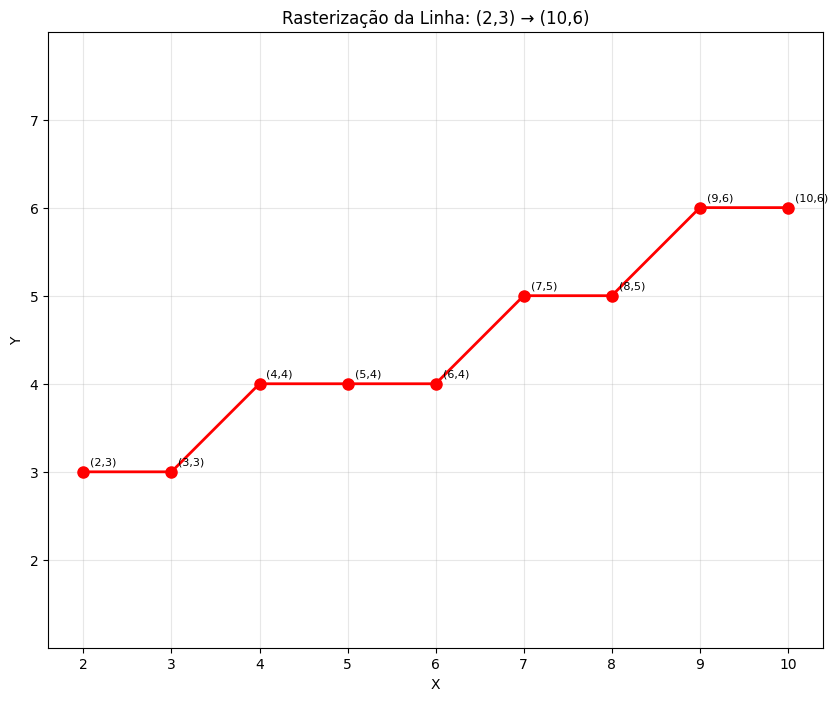

Pixels ativados: [(2, 3), (3, 3), (4, 4), (5, 4), (6, 4), (7, 5), (8, 5), (9, 6), (10, 6)]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def rasterizar_linha_matplotlib(x0, y0, x1, y1):
    """
    Versão com visualização gráfica usando matplotlib.
    """
    pontos = rasterizar_linha(x0, y0, x1, y1)
    
    # Extrai coordenadas
    xs = [p[0] for p in pontos]
    ys = [p[1] for p in pontos]
    
    # Configura o plot
    plt.figure(figsize=(10, 8))
    plt.plot(xs, ys, 'ro-', markersize=8, linewidth=2)
    plt.grid(True, alpha=0.3)
    plt.title(f'Rasterização da Linha: ({x0},{y0}) → ({x1},{y1})')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Adiciona coordenadas dos pontos
    for i, (x, y) in enumerate(pontos):
        plt.annotate(f'({x},{y})', (x, y), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
    
    plt.axis('equal')
    plt.show()
    
    return pontos

# Exemplo de uso com matplotlib
pontos = rasterizar_linha_matplotlib(2, 3, 10, 6)
print(f"Pixels ativados: {pontos}")

Explicação do Algoritmo:

    Cálculo de Diferenças: Calcula Δx e Δy entre os pontos inicial e final.

    Determinação de Direção: Usa sx e sy para determinar se a linha se move para a direita/esquerda e para cima/baixo.

    Variável de Erro: A variável erro acumula a distância perpendicular entre a linha ideal e a posição do pixel atual.

    Loop Principal: Para cada pixel:

        Adiciona o ponto atual à lista

        Atualiza o erro

        Move na direção x se o erro for significativo na direção y

        Move na direção y se o erro for significativo na direção x

    Critério de Parada: O loop termina quando atinge o ponto final.

Características Importantes:

    ✅ Apenas aritmética inteira (muito eficiente)

    ✅ Nenhuma multiplicação no loop principal

    ✅ Funciona para todos os octantes (quaisquer direções)

    ✅ Produz a melhor aproximação possível para uma linha reta em uma grade discreta

O código inclui exemplos de linhas com diferentes inclinações e uma função de visualização que mostra os pixels ativados em uma grade ASCII.


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


=== RASTERIZAÇÃO DE TRIÂNGULO - COORDENADAS BARICÊNTRICAS ===

Vértices do triângulo:
A: (2, 2), B: (8, 15), C: (15, 5)

Área do triângulo: -75.50
Pixels rasterizados: 78
Bounding box: X[2-15], Y[2-15]

Visualização ASCII (zoom na região do triângulo):
   0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9
  +----------------------------------------
19|· · · · · · · · · · · · · · · · · · · ·
18|· · · · · · · · · · · · · · · · · · · ·
17|· · · · · · · · · · · · · · · · · · · ·
16|· · · · · · · · · · · · · · · · · · · ·
15|· · · · · · · · X · · · · · · · · · · ·
14|· · · · · · · · X · · · · · · · · · · ·
13|· · · · · · · · X X · · · · · · · · · ·
12|· · · · · · · X X X X · · · · · · · · ·
11|· · · · · · · X X X X · · · · · · · · ·
10|· · · · · · X X X X X X · · · · · · · ·
 9|· · · · · · X X X X X X X · · · · · · ·
 8|· · · · · X X X X X X X X · · · · · · ·
 7|· · · · · X X X X X X X X X · · · · · ·
 6|· · · · X X X X X X X X X X X · · · · ·
 5|· · · · X X X X X X X X X X X X · · · ·
 4|· · · X X X 

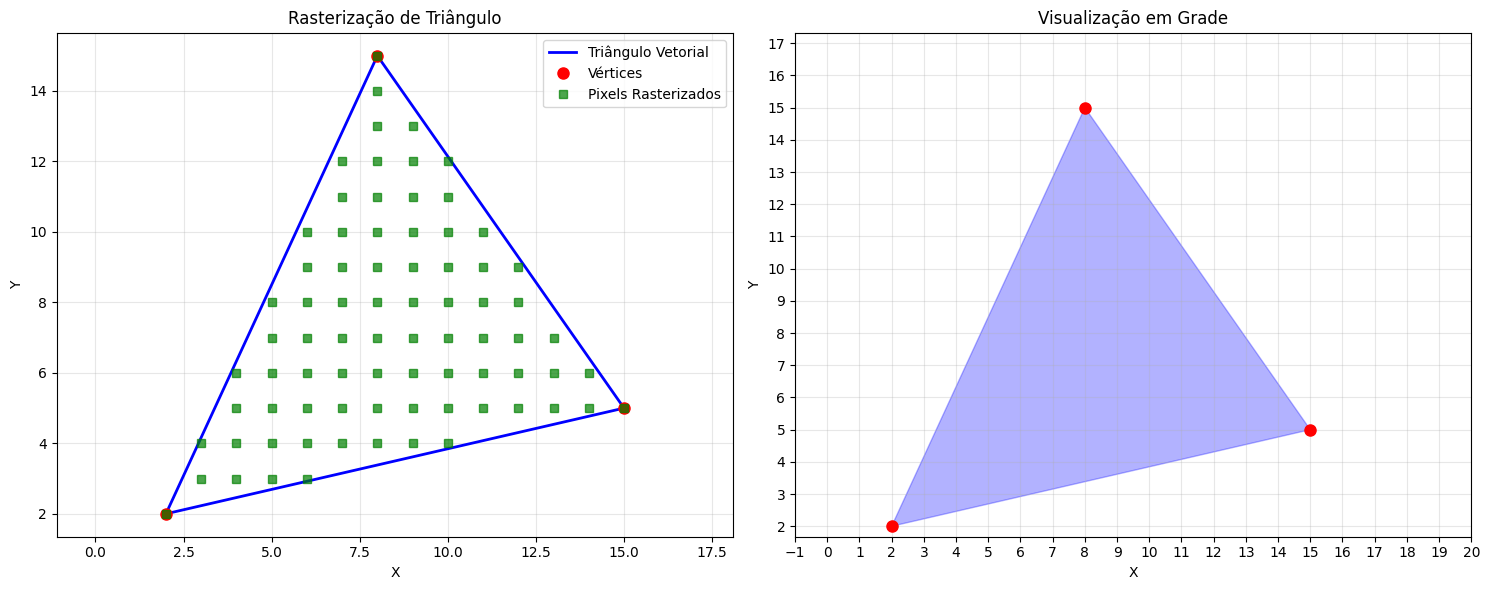


=== EXEMPLO COM INTERPOLAÇÃO DE CORES ===


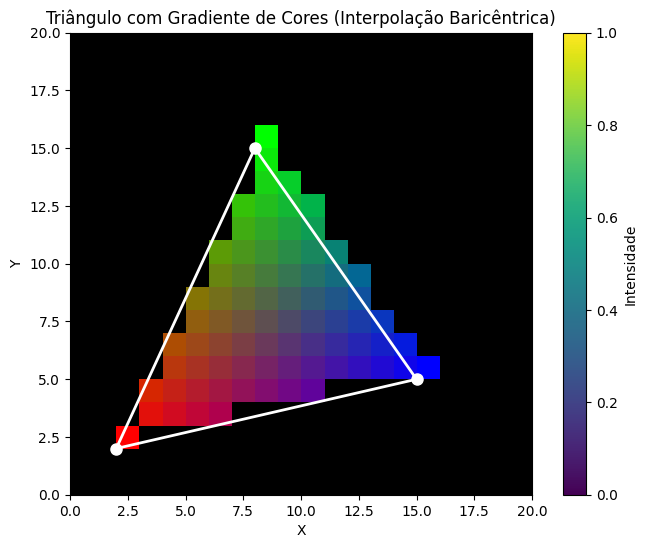

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def calcular_area_2x(v1, v2, v3):
    """
    Calcula duas vezes a área com sinal do triângulo formado por três pontos.
    Retorna um valor positivo se os pontos estiverem em ordem CCW.
    """
    return (v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0])

def rasterizar_triangulo(vertices, largura=20, altura=20):
    """
    Rasteriza um triângulo definido por três vértices usando coordenadas baricêntricas.
    Retorna uma lista de pixels (x, y) dentro do triângulo.
    """
    A, B, C = vertices
    
    # Calcula a área total (2x) do triângulo ABC
    area_total = calcular_area_2x(A, B, C)
    
    # Encontra a bounding box do triângulo
    min_x = max(0, min(A[0], B[0], C[0]))
    max_x = min(largura - 1, max(A[0], B[0], C[0]))
    min_y = max(0, min(A[1], B[1], C[1]))
    max_y = min(altura - 1, max(A[1], B[1], C[1]))
    
    pixels_dentro = []
    
    # Itera sobre todos os pixels na bounding box
    for y in range(min_y, max_y + 1):
        for x in range(min_x, max_x + 1):
            P = (x, y)
            
            # Calcula as áreas parciais (2x)
            area_PBC = calcular_area_2x(P, B, C)
            area_PCA = calcular_area_2x(P, C, A)
            area_PAB = calcular_area_2x(P, A, B)
            
            # Calcula as coordenadas baricêntricas
            alpha = area_PBC / area_total
            beta = area_PCA / area_total
            gamma = area_PAB / area_total
            
            # Verifica se o ponto está dentro do triângulo
            if alpha >= 0 and beta >= 0 and gamma >= 0:
                # Pequena tolerância para erros de ponto flutuante
                if abs(alpha + beta + gamma - 1.0) < 0.0001:
                    pixels_dentro.append((x, y))
    
    return pixels_dentro

def desenhar_triangulo_ascii(vertices, pixels_dentro, largura=20, altura=20):
    """
    Desenha o triângulo rasterizado em uma grade ASCII para visualização.
    """
    # Cria uma grade vazia
    grade = [['·' for _ in range(largura)] for _ in range(altura)]
    
    # Marca os vértices
    for i, (x, y) in enumerate(vertices):
        if 0 <= x < largura and 0 <= y < altura:
            grade[y][x] = 'ABC'[i]
    
    # Marca os pixels dentro do triângulo
    for x, y in pixels_dentro:
        if 0 <= x < largura and 0 <= y < altura:
            grade[y][x] = 'X'
    
    # Imprime a grade (invertendo Y para ter origem no canto inferior)
    print("   " + " ".join(str(i % 10) for i in range(largura)))
    print("  +" + "--" * largura)
    
    for i in range(altura-1, -1, -1):
        linha_str = f"{i:2d}|" + " ".join(grade[i])
        print(linha_str)

def visualizar_triangulo_matplotlib(vertices, pixels_dentro):
    """
    Visualiza o triângulo usando matplotlib com representação gráfica.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Extrai coordenadas
    A, B, C = vertices
    xs = [A[0], B[0], C[0], A[0]]
    ys = [A[1], B[1], C[1], A[1]]
    
    # Plot 1: Triângulo vetorial e pixels rasterizados
    ax1.plot(xs, ys, 'b-', linewidth=2, label='Triângulo Vetorial')
    ax1.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'ro', markersize=8, label='Vértices')
    
    # Plota os pixels rasterizados
    if pixels_dentro:
        px_x = [p[0] for p in pixels_dentro]
        px_y = [p[1] for p in pixels_dentro]
        ax1.plot(px_x, px_y, 's', color='green', markersize=6, alpha=0.7, label='Pixels Rasterizados')
    
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Rasterização de Triângulo')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.legend()
    ax1.axis('equal')
    
    # Plot 2: Visualização em grade
    ax2.add_patch(Polygon(vertices, closed=True, fill=True, alpha=0.3, color='blue'))
    ax2.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'ro', markersize=8)
    
    # Desenha a grade
    ax2.set_xticks(np.arange(-1, 21))
    ax2.set_yticks(np.arange(-1, 21))
    ax2.grid(True, alpha=0.3)
    ax2.set_title('Visualização em Grade')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.axis('equal')
    ax2.set_xlim(-1, 20)
    ax2.set_ylim(-1, 20)
    
    plt.tight_layout()
    plt.show()

def interpolar_cor(vertices, cores, pixel, pixels_dentro):
    """
    Interpola cores dos vértices para criar um gradiente no triângulo.
    """
    A, B, C = vertices
    cor_A, cor_B, cor_C = cores
    
    # Calcula coordenadas baricêntricas
    area_total = calcular_area_2x(A, B, C)
    area_PBC = calcular_area_2x(pixel, B, C)
    area_PCA = calcular_area_2x(pixel, C, A)
    area_PAB = calcular_area_2x(pixel, A, B)
    
    alpha = area_PBC / area_total
    beta = area_PCA / area_total
    gamma = area_PAB / area_total
    
    # Interpola a cor
    cor_interpolada = (
        alpha * cor_A[0] + beta * cor_B[0] + gamma * cor_C[0],
        alpha * cor_A[1] + beta * cor_B[1] + gamma * cor_C[1],
        alpha * cor_A[2] + beta * cor_B[2] + gamma * cor_C[2]
    )
    
    return cor_interpolada

# Exemplo de uso
if __name__ == "__main__":
    print("=== RASTERIZAÇÃO DE TRIÂNGULO - COORDENADAS BARICÊNTRICAS ===\n")
    
    # Define os vértices do triângulo (x, y)
    vertices = [(2, 2), (8, 15), (15, 5)]
    A, B, C = vertices
    
    print(f"Vértices do triângulo:")
    print(f"A: {A}, B: {B}, C: {C}")
    
    # Rasteriza o triângulo
    pixels_dentro = rasterizar_triangulo(vertices, largura=20, altura=20)
    
    # Exibe informações
    area_total = calcular_area_2x(A, B, C) / 2
    print(f"\nÁrea do triângulo: {area_total:.2f}")
    print(f"Pixels rasterizados: {len(pixels_dentro)}")
    print(f"Bounding box: X[{min(A[0], B[0], C[0])}-{max(A[0], B[0], C[0])}], "
          f"Y[{min(A[1], B[1], C[1])}-{max(A[1], B[1], C[1])}]")
    
    # Visualização ASCII (apenas parte central)
    print("\nVisualização ASCII (zoom na região do triângulo):")
    desenhar_triangulo_ascii(vertices, pixels_dentro, largura=20, altura=20)
    
    # Visualização gráfica com matplotlib
    print("\nGerando visualização gráfica...")
    visualizar_triangulo_matplotlib(vertices, pixels_dentro)
    
    # Exemplo com interpolação de cores
    print("\n=== EXEMPLO COM INTERPOLAÇÃO DE CORES ===")
    
    # Define cores para cada vértice (R, G, B)
    cores_vertices = [
        (1.0, 0.0, 0.0),  # Vermelho no vértice A
        (0.0, 1.0, 0.0),  # Verde no vértice B
        (0.0, 0.0, 1.0)   # Azul no vértice C
    ]
    
    # Cria imagem com gradiente
    imagem = np.zeros((20, 20, 3))
    for x, y in pixels_dentro:
        cor = interpolar_cor(vertices, cores_vertices, (x, y), pixels_dentro)
        imagem[y, x] = cor
    
    # Plota a imagem com gradiente
    plt.figure(figsize=(8, 6))
    plt.imshow(imagem, origin='lower', extent=[0, 20, 0, 20])
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'w-', linewidth=2)
    plt.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'wo', markersize=8)
    plt.title('Triângulo com Gradiente de Cores (Interpolação Baricêntrica)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(label='Intensidade')
    plt.show()

Características do Código:

    Algoritmo de Coordenadas Baricêntricas: Usa áreas relativas para determinar se um pixel está dentro do triângulo.

    Otimizações:

        Calcula apenas a bounding box do triângulo

        Usa área 2x para evitar divisões desnecessárias

        Implementa tolerância para erros de ponto flutuante

    Visualizações Múltiplas:

        Visualização ASCII no terminal

        Visualização gráfica com matplotlib

        Gradiente de cores usando interpolação baricêntrica

    Funcionalidades Adicionais:

        Cálculo de área do triângulo

        Interpolação de cores para vértices coloridos

        Detecção de orientação (CW/CCW)

Como Funciona:

    Cálculo de Áreas: Usa determinantes para calcular áreas de triângulos

    Coordenadas Baricêntricas: α, β, γ representam a "proximidade" de cada vértice

    Teste de Pertencimento: Se todas as coordenadas ≥ 0, o ponto está dentro

    Otimização: Só testa pixels dentro da bounding box do triângulo

O Blender tem uma API Python muito poderosa (bpy) que permite controlar quase todos os aspectos do software, incluindo a visualização do processo de rasterização.

Aqui está um script completo para visualizar a rasterização no Blender 4.5:

```python
import bpy
import bmesh
import math

def clear_scene():
    """Limpa a cena de objetos existentes"""
    bpy.ops.object.select_all(action='SELECT')
    bpy.ops.object.delete(use_global=False, confirm=False)
    
    # Remove materiais existentes
    for material in bpy.data.materials:
        bpy.data.materials.remove(material)

def create_rasterization_visualization():
    """Cria visualização completa da rasterização - Versão compatível"""
    clear_scene()
    
    print("Criando visualização de rasterização compatível...")
    
    # 1. CRIA UM TRIÂNGULO DE EXEMPLO (coordenadas inteiras para facilitar)
    verts = [(2, 2, 0), (8, 8, 0), (12, 3, 0)]
    faces = [(0, 1, 2)]
    
    # Cria malha do triângulo
    mesh = bpy.data.meshes.new("Triangulo_Base")
    mesh.from_pydata(verts, [], faces)
    obj = bpy.data.objects.new("Triangulo", mesh)
    bpy.context.collection.objects.link(obj)
    
    # Material simples para o triângulo (azul)
    mat_tri = bpy.data.materials.new(name="Material_Triangulo")
    mat_tri.diffuse_color = (0.1, 0.5, 1.0, 1.0)
    obj.data.materials.append(mat_tri)

    # 2. FUNÇÃO PARA VERIFICAR SE PONTO ESTÁ DENTRO DO TRIÂNGULO
    def ponto_no_triangulo(px, py, v0, v1, v2):
        """Verifica se o ponto (px, py) está dentro do triângulo usando áreas"""
        def area_triangulo(a, b, c):
            return abs((b[0]-a[0])*(c[1]-a[1]) - (c[0]-a[0])*(b[1]-a[1])) / 2.0
        
        area_total = area_triangulo(v0, v1, v2)
        area1 = area_triangulo((px, py), v1, v2)
        area2 = area_triangulo(v0, (px, py), v2)
        area3 = area_triangulo(v0, v1, (px, py))
        
        # Pequena tolerância para erros de ponto flutuante
        return abs(area_total - (area1 + area2 + area3)) < 0.0001

    # 3. CALCULA BOUNDING BOX
    min_x = min(v[0] for v in verts)
    max_x = max(v[0] for v in verts)
    min_y = min(v[1] for v in verts)
    max_y = max(v[1] for v in verts)
    
    # 4. CRIA PIXELS (CUBOS)
    pixels_dentro = []
    
    for x in range(int(min_x) - 1, int(max_x) + 2):
        for y in range(int(min_y) - 1, int(max_y) + 2):
            # Verifica se o pixel está dentro do triângulo
            if ponto_no_triangulo(x + 0.5, y + 0.5, verts[0], verts[1], verts[2]):
                pixels_dentro.append((x, y))
                
                # Cria cubo representando o pixel
                bpy.ops.mesh.primitive_cube_add(size=0.9, location=(x, y, 0))
                pixel_obj = bpy.context.active_object
                pixel_obj.name = f"Pixel_{x}_{y}_Dentro"
                
                # Material vermelho para pixels dentro
                mat_vermelho = bpy.data.materials.new(name=f"Vermelho_{x}_{y}")
                mat_vermelho.diffuse_color = (1.0, 0.0, 0.0, 1.0)
                pixel_obj.data.materials.append(mat_vermelho)
            
            else:
                # Cria cubo para pixels fora (mais transparente)
                bpy.ops.mesh.primitive_cube_add(size=0.9, location=(x, y, 0))
                pixel_obj = bpy.context.active_object
                pixel_obj.name = f"Pixel_{x}_{y}_Fora"
                
                # Material cinza transparente para pixels fora
                mat_cinza = bpy.data.materials.new(name=f"Cinza_{x}_{y}")
                mat_cinza.diffuse_color = (0.7, 0.7, 0.7, 0.3)
                pixel_obj.data.materials.append(mat_cinza)

    # 5. CRIA GRADE DE REFERÊNCIA (plano simples)
    bpy.ops.mesh.primitive_plane_add(size=20, location=(7, 5, -0.5))
    grade = bpy.context.active_object
    grade.name = "Grade_Referencia"
    
    # Material para a grade (cinza muito transparente)
    mat_grade = bpy.data.materials.new(name="Material_Grade")
    mat_grade.diffuse_color = (0.8, 0.8, 0.8, 0.1)
    grade.data.materials.append(mat_grade)

    # 6. CONFIGURA CÂMERA
    bpy.ops.object.camera_add(location=(7, -15, 12))
    camera = bpy.context.active_object
    camera.rotation_euler = (1.1, 0, 0)  # Ângulo para visualizar melhor
    bpy.context.scene.camera = camera
    
    # 7. ADICIONA LUZ BÁSICA
    bpy.ops.object.light_add(type='SUN', location=(5, -5, 10))
    sol = bpy.context.active_object
    sol.data.energy = 2.0  # Intensidade da luz

    # 8. CONFIGURA RENDERIZAÇÃO BÁSICA
    bpy.context.scene.render.engine = 'BLENDER_EEVEE'  # Mais compatível
    bpy.context.scene.eevee.use_ssr = True  # Reflexões simples
    
    print(f"Rasterização concluída! {len(pixels_dentro)} pixels dentro do triângulo.")
    
    # Move a câmera para enquadrar a cena
    bpy.ops.view3d.camera_to_view_selected()

def create_simple_demo():
    """Versão ainda mais simples para máxima compatibilidade"""
    clear_scene()
    
    print("Criando demonstração super simples...")
    
    # Triângulo básico
    verts = [(3, 3, 0), (7, 7, 0), (10, 2, 0)]
    
    # Cria triângulo
    mesh = bpy.data.meshes.new("Triangulo_Simples")
    mesh.from_pydata(verts, [], [(0, 1, 2)])
    obj = bpy.data.objects.new("Triangulo", mesh)
    bpy.context.collection.objects.link(obj)
    
    # Material azul para o triângulo
    mat_azul = bpy.data.materials.new(name="Azul")
    mat_azul.diffuse_color = (0.2, 0.4, 0.8, 1.0)
    obj.data.materials.append(mat_azul)
    
    # Função simples para verificar se está dentro
    def esta_dentro(x, y):
        # Método de verificação por semi-planos
        v0, v1, v2 = verts
        d1 = (x - v0[0]) * (v1[1] - v0[1]) - (y - v0[1]) * (v1[0] - v0[0])
        d2 = (x - v1[0]) * (v2[1] - v1[1]) - (y - v1[1]) * (v2[0] - v1[0])
        d3 = (x - v2[0]) * (v0[1] - v2[1]) - (y - v2[1]) * (v0[0] - v2[0])
        
        return (d1 >= 0 and d2 >= 0 and d3 >= 0) or (d1 <= 0 and d2 <= 0 and d3 <= 0)
    
    # Cria apenas os pixels DENTRO do triângulo (para melhor performance)
    for x in range(2, 12):
        for y in range(2, 9):
            if esta_dentro(x + 0.5, y + 0.5):  # Verifica o centro do pixel
                bpy.ops.mesh.primitive_cube_add(size=0.95, location=(x, y, 0))
                pixel = bpy.context.active_object
                
                # Material vermelho
                mat_vermelho = bpy.data.materials.new(name=f"Vermelho_{x}_{y}")
                mat_vermelho.diffuse_color = (1.0, 0.0, 0.0, 1.0)
                pixel.data.materials.append(mat_vermelho)
    
    # Configura câmera
    bpy.ops.object.camera_add(location=(6, -10, 8))
    camera = bpy.context.active_object
    camera.rotation_euler = (1.0, 0, 0)
    bpy.context.scene.camera = camera
    
    # Luz básica
    bpy.ops.object.light_add(type='SUN', location=(5, -5, 5))
    
    print("Demonstração simples criada com sucesso!")

# INTERFACE SIMPLES
class SimpleRasterPanel(bpy.types.Panel):
    bl_label = "Rasterização Simples"
    bl_idname = "VIEW3D_PT_raster_simple"
    bl_space_type = 'VIEW_3D'
    bl_region_type = 'UI'
    bl_category = 'Ferramentas'

    def draw(self, context):
        layout = self.layout
        layout.operator("scene.raster_simple")
        layout.operator("scene.raster_demo")
        layout.operator("scene.limpar_tudo")

class OT_SimpleRaster(bpy.types.Operator):
    bl_idname = "scene.raster_simple"
    bl_label = "Rasterização Básica"
    
    def execute(self, context):
        create_rasterization_visualization()
        self.report({'INFO'}, "Rasterização básica criada!")
        return {'FINISHED'}

class OT_DemoRaster(bpy.types.Operator):
    bl_idname = "scene.raster_demo"
    bl_label = "Demo Super Simples"
    
    def execute(self, context):
        create_simple_demo()
        self.report({'INFO'}, "Demo simples criada!")
        return {'FINISHED'}

class OT_CleanAll(bpy.types.Operator):
    bl_idname = "scene.limpar_tudo"
    bl_label = "Limpar Tudo"
    
    def execute(self, context):
        clear_scene()
        self.report({'INFO'}, "Cena limpa!")
        return {'FINISHED'}

# Registro das classes
classes = [SimpleRasterPanel, OT_SimpleRaster, OT_DemoRaster, OT_CleanAll]

def register():
    for cls in classes:
        bpy.utils.register_class(cls)

def unregister():
    for cls in classes:
        bpy.utils.unregister_class(cls)

# Execução principal
if __name__ == "__main__":
    register()
    
    # Executa a versão mais simples por padrão
    create_simple_demo()
    
    # Mostra mensagem no terminal
    print("=" * 50)
    print("VISUALIZAÇÃO DE RASTERIZAÇÃO CRIADA!")
    print("Use a aba 'Ferramentas' na sidebar (N) para controlar")
    print("=" * 50)
```

### **Como usar o script no Blender 4.5:**

1.  **Abra o Blender** e delete o cubo inicial
2.  **Mude para o Scripting Workspace** (aba superior)
3.  **Crie um novo script** text e cole o código acima
4.  **Execute o script** (botão "Run Script")

### **O que o script faz:**

1.  **Cria um triângulo** azul como objeto vetorial
2.  **Calcula a bounding box** do triângulo
3.  **Gera uma grade de cubos** representando pixels
4.  **Pinta os cubos** de vermelho se estiverem dentro do triângulo, cinza se estiverem fora
5.  **Cria uma grade de referência** transparente
6.  **Configura câmera e iluminação** para melhor visualização
7.  **Adiciona um painel interativo** na sidebar (N-panel) para controlar a visualização

### **Funcionalidades extras:**

- **Animação:** Os pixels aparecem sequencialmente, simulando o processo de rasterização
- **Interface gráfica:** Painel com botões para criar e animar a visualização
- **Materiais diferenciados:** Cores diferentes para pixels dentro/fora do triângulo

### **Para educadores:**

Este script é perfeito para aulas de Computação Gráfica! Os alunos podem:

1.  Modificar os vértices do triângulo
2.  Alterar a resolução da grade de pixels
3.  Visualizar o efeito do aliasing (serrilhado)
4.  Entender o conceito de coordenadas baricêntricas
5.  Ver a diferença entre representação vetorial (triângulo suave) e raster (pixels discretos)

A visualização 3D no Blender é muito mais impactante que gráficos 2D, mostrando claramente a natureza discreta da rasterização!

In [7]:
### Exercício: Verificar se um ponto está dentro do triângulo

Dado o triângulo definido pelos vértices `A = (2, 2)`, `B = (8, 15)` e `C = (15, 5)`, escreva uma função chamada `ponto_no_triangulo` que verifica se um ponto `(x, y)` está dentro do triângulo.

#### Regras:
1. Use o método das **áreas baricêntricas** para determinar se o ponto está dentro do triângulo.
2. A função deve retornar `True` se o ponto estiver dentro ou na borda do triângulo, e `False` caso contrário.

#### Exemplo de Entrada:

SyntaxError: invalid syntax (4293751062.py, line 3)

In [8]:
def ponto_no_triangulo(x, y, A, B, C):
    """
    Verifica se o ponto (x, y) está dentro do triângulo definido pelos vértices A, B e C.
    Retorna True se o ponto estiver dentro ou na borda do triângulo, caso contrário retorna False.
    """
    def calcular_area(v1, v2, v3):
        # Calcula a área com sinal do triângulo formado pelos pontos v1, v2 e v3
        return abs((v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0]))

    # Calcula a área total do triângulo ABC
    area_total = calcular_area(A, B, C)

    # Calcula as áreas dos sub-triângulos formados com o ponto (x, y)
    area_PBC = calcular_area((x, y), B, C)
    area_PCA = calcular_area((x, y), C, A)
    area_PAB = calcular_area((x, y), A, B)

    # Verifica se a soma das áreas dos sub-triângulos é igual à área total
    # Pequena tolerância para erros de ponto flutuante
    return abs(area_total - (area_PBC + area_PCA + area_PAB)) < 1e-6

# Exemplo de uso
x, y = 8, 10
A, B, C = (2, 2), (8, 15), (15, 5)

resultado = ponto_no_triangulo(x, y, A, B, C)
print(f"O ponto ({x}, {y}) está dentro do triângulo? {resultado}")

O ponto (8, 10) está dentro do triângulo? True


In [9]:
### Exercício Intermediário: Verificar se um Pixel Está Dentro do Triângulo e Interpolar Cor

Dado o triângulo definido pelos vértices `A = (2, 2)`, `B = (8, 15)` e `C = (15, 5)`, e suas respectivas cores `cor_A = (1.0, 0.0, 0.0)` (vermelho), `cor_B = (0.0, 1.0, 0.0)` (verde) e `cor_C = (0.0, 0.0, 1.0)` (azul), escreva uma função que:

1. Verifique se um pixel `(x, y)` está dentro do triângulo usando **coordenadas baricêntricas**.
2. Se o pixel estiver dentro, calcule sua cor interpolada com base nas cores dos vértices.
3. Retorne a cor interpolada do pixel ou `None` caso o pixel esteja fora do triângulo.

#### Assinatura da Função:
```python
def cor_pixel_triangulo(x, y, A, B, C, cor_A, cor_B, cor_C):
    """
    Verifica se o pixel (x, y) está dentro do triângulo definido por A, B, C.
    Se estiver, retorna a cor interpolada do pixel.
    Caso contrário, retorna None.
    """
```

#### Regras:
- Utilize a fórmula das áreas para calcular as coordenadas baricêntricas `α`, `β` e `γ`.
- Considere que o pixel está dentro do triângulo se `α >= 0`, `β >= 0`, `γ >= 0` e `α + β + γ ≈ 1` (com tolerância para erros de ponto flutuante).
- A cor do pixel deve ser calculada como:
  \[
  \text{cor\_pixel} = \alpha \cdot \text{cor\_A} + \beta \cdot \text{cor\_B} + \gamma \cdot \text{cor\_C}
  \]

#### Exemplo de Entrada:
```python
x, y = 8, 10
A, B, C = (2, 2), (8, 15), (15, 5)
cor_A, cor_B, cor_C = (1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0)
```

#### Exemplo de Saída:
```python
(0.3, 0.6, 0.1)  # Cor interpolada do pixel (8, 10)
```

#### Dica:
- Use a função auxiliar para calcular a área com sinal:
  ```python
  def calcular_area(v1, v2, v3):
      return abs((v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0]))
  ```
- As coordenadas baricêntricas podem ser calculadas como:
  \[
  \alpha = \frac{\text{Área}(P, B, C)}{\text{Área}(A, B, C)}, \quad
  \beta = \frac{\text{Área}(P, C, A)}{\text{Área}(A, B, C)}, \quad
  \gamma = \frac{\text{Área}(P, A, B)}{\text{Área}(A, B, C)}
  \]

SyntaxError: invalid character '≈' (U+2248) (1681413504.py, line 21)

In [10]:
def cor_pixel_triangulo(x, y, A, B, C, cor_A, cor_B, cor_C):
    """
    Verifica se o pixel (x, y) está dentro do triângulo definido por A, B, C.
    Se estiver, retorna a cor interpolada do pixel.
    Caso contrário, retorna None.
    """
    def calcular_area(v1, v2, v3):
        # Calcula a área com sinal do triângulo formado pelos pontos v1, v2 e v3
        return abs((v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0]))

    # Calcula a área total do triângulo ABC
    area_total = calcular_area(A, B, C)

    # Calcula as áreas dos sub-triângulos formados com o ponto (x, y)
    area_PBC = calcular_area((x, y), B, C)
    area_PCA = calcular_area((x, y), C, A)
    area_PAB = calcular_area((x, y), A, B)

    # Calcula as coordenadas baricêntricas
    alpha = area_PBC / area_total
    beta = area_PCA / area_total
    gamma = area_PAB / area_total

    # Verifica se o ponto está dentro do triângulo
    if alpha >= 0 and beta >= 0 and gamma >= 0 and abs(alpha + beta + gamma - 1.0) < 1e-6:
        # Interpola a cor do pixel
        cor_pixel = (
            alpha * cor_A[0] + beta * cor_B[0] + gamma * cor_C[0],
            alpha * cor_A[1] + beta * cor_B[1] + gamma * cor_C[1],
            alpha * cor_A[2] + beta * cor_B[2] + gamma * cor_C[2]
        )
        return cor_pixel
    else:
        return None

# Exemplo de uso
x, y = 8, 10
A, B, C = (2, 2), (8, 15), (15, 5)
cor_A, cor_B, cor_C = (1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0)

resultado = cor_pixel_triangulo(x, y, A, B, C, cor_A, cor_B, cor_C)
if resultado:
    print(f"O pixel ({x}, {y}) está dentro do triângulo e sua cor interpolada é: {resultado}")
else:
    print(f"O pixel ({x}, {y}) está fora do triângulo.")


O pixel (8, 10) está dentro do triângulo e sua cor interpolada é: (0.23178807947019867, 0.5695364238410596, 0.1986754966887417)
